In [1]:
import astropy.units as u
from astropy.constants import au, R_sun
from astropy.stats import gaussian_fwhm_to_sigma
import math
import numpy as np
from astropy.constants import au, R_sun
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math

In [3]:
transunit = ((au/R_sun).value)**2 / 1000
transunit*19.8*(16*math.pi/(180*60))**2

0.019831894679013688

# Ëøô‰∏™Êñá‰ª∂‰∏ªË¶ÅËØ¥ÊòéÊàëÂæóÂá∫‰∫Ü‰∏é P46Âõæ3.6 Áõ∏ÂèçÁöÑÁªìÊûú
<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:30%;" />
alpha beta ÊñπÂêëÈÉΩÂ±ïÁ§∫

## ÊàëÁöÑÁªìÊûú 2048 aiapy normalized
$\lambda$ range: -0.1,0.25,25 

In [4]:

from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_normalized.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

In [5]:
DN['DN_alpha'].shape

(61, 25)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

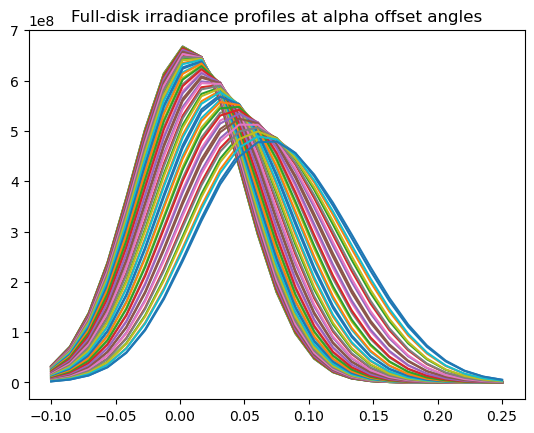

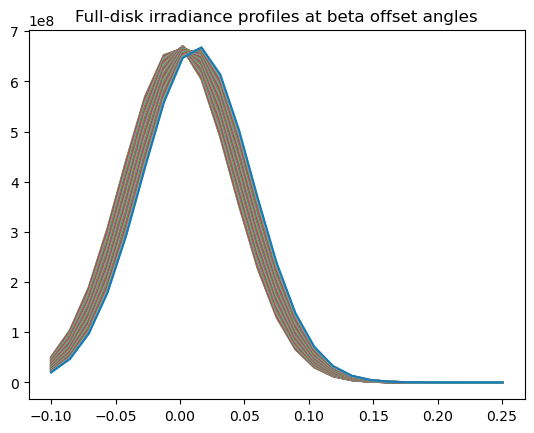

In [6]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∂ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∑ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

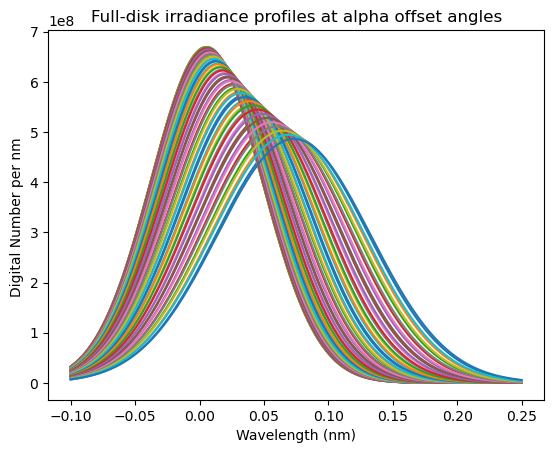

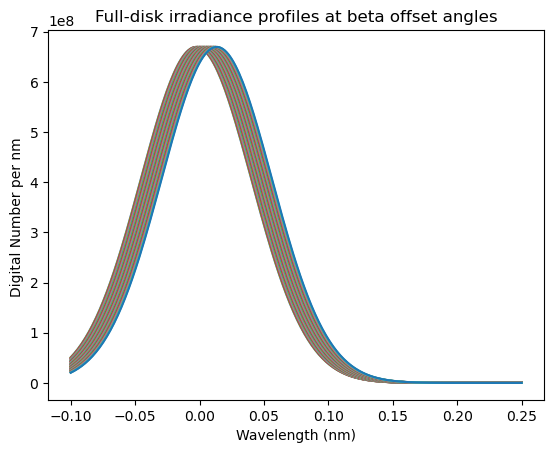

In [7]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

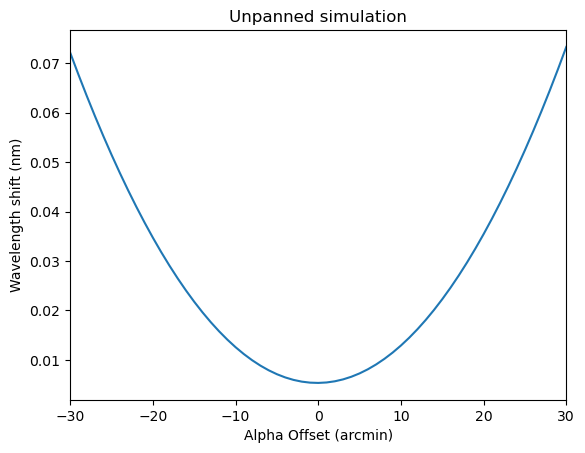

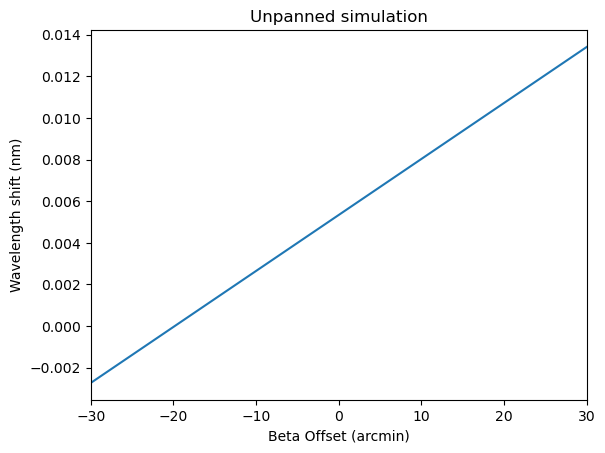

In [8]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

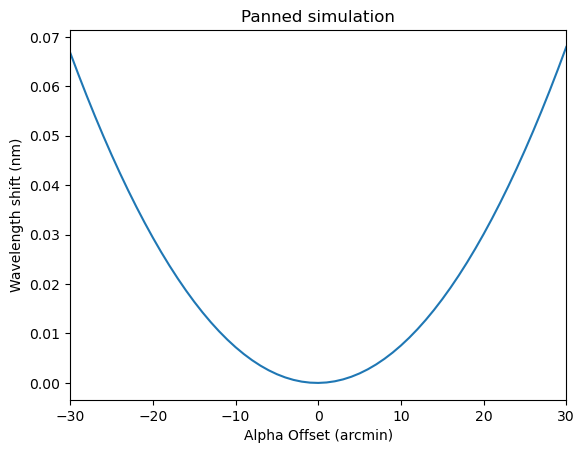

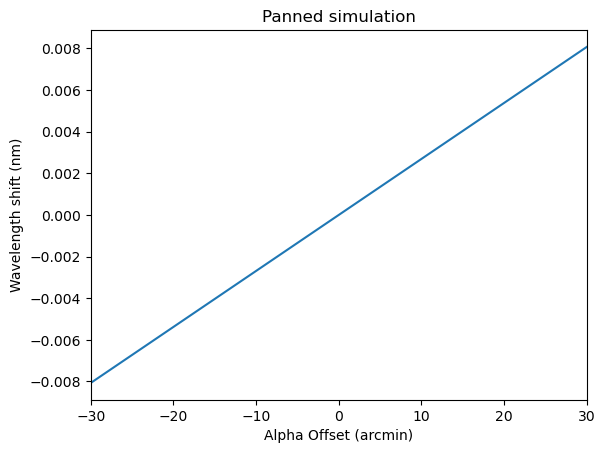

In [48]:
# Panned central wavelength shift
# Y ËΩ¥ÁöÑÈõ∂ÁÇπË¢´ËÆæÂÆö‰∏∫ÂÖ®Êó•Èù¢ He II Ë∞±Á∫øÂú®Ê≤°Êúâ‰ªª‰Ωï SDO Âç´ÊòüÂÅèËΩ¨Êó∂ÁöÑ‰∏≠ÂøÉÊ≥¢Èïø‰ΩçÁΩÆÔºå
# ‰πüÂ∞±ÊòØùõº = 0‰∏îùõΩ = 0ÁöÑÊÉÖÂÜµ
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [49]:
#beta ÊñπÂêë‰∏éËÆ∫Êñá‰∏≠Á¨¶ÂêàÁöÑÂæàÂ•ΩÔºåÂ∞±Ê≤°ÊúâÁªßÁª≠ËÆ®ËÆ∫‰∫Ü
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[0]

0.06674324858879875

In [50]:
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[-1]

0.06795719141668354

(-30.0, 30.0)

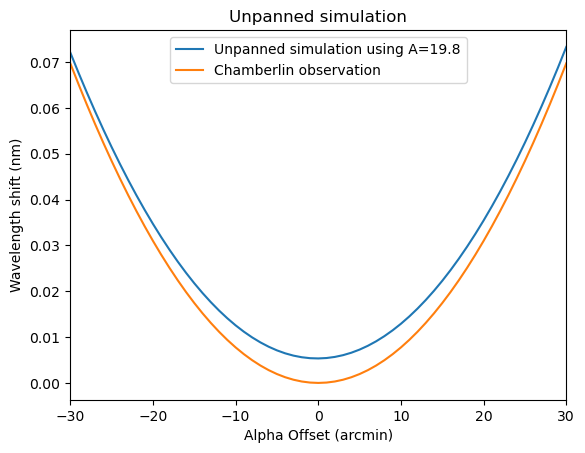

In [51]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

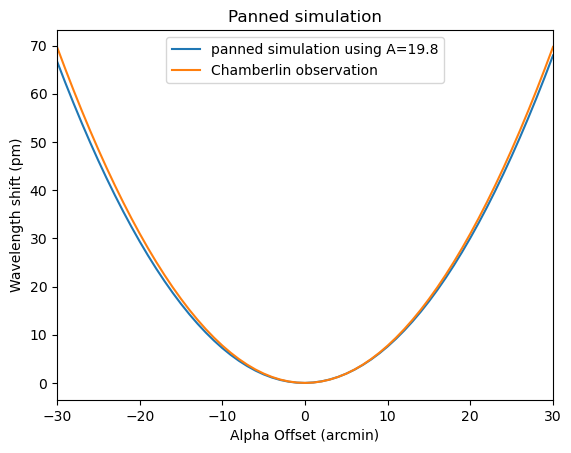

In [27]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*(wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]))
ax.plot(offaxis_angle_x_min_alpha,1e3*915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

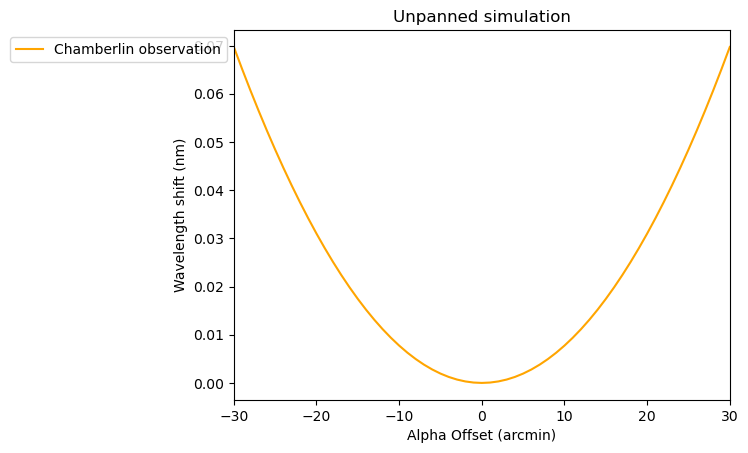

In [23]:
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,10*915.53*offaxis_angle_x_alpha**2,c="orange")  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Chamberlin observation"],bbox_to_anchor=(0, 1))
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## ÊàëÁöÑÁªìÊûú 2048 IDL

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

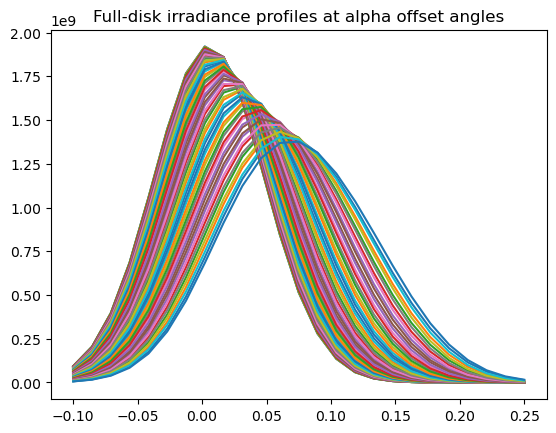

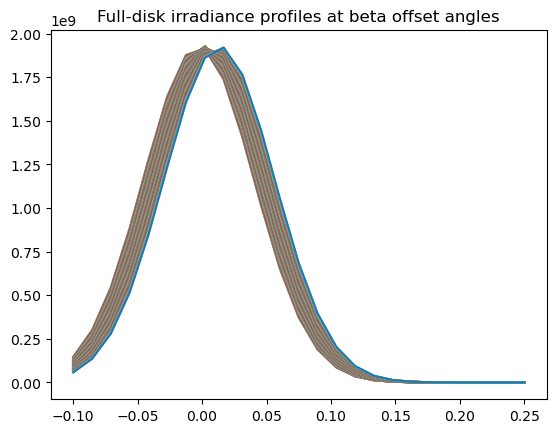

In [54]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∂ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∑ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

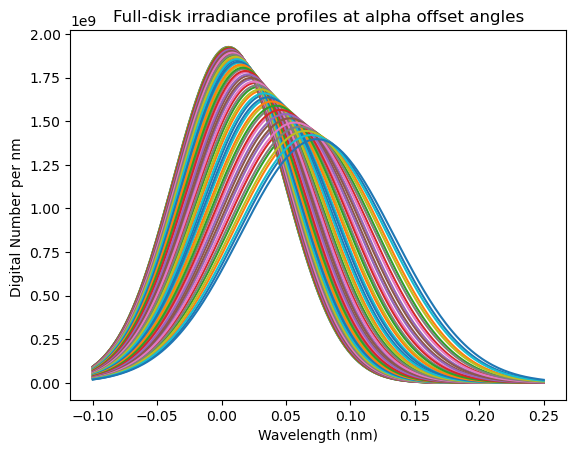

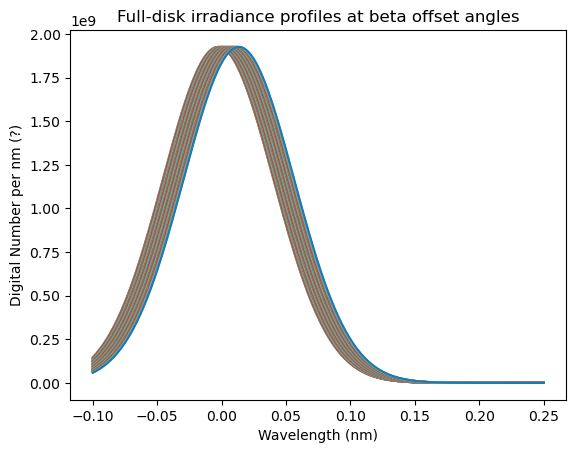

In [55]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

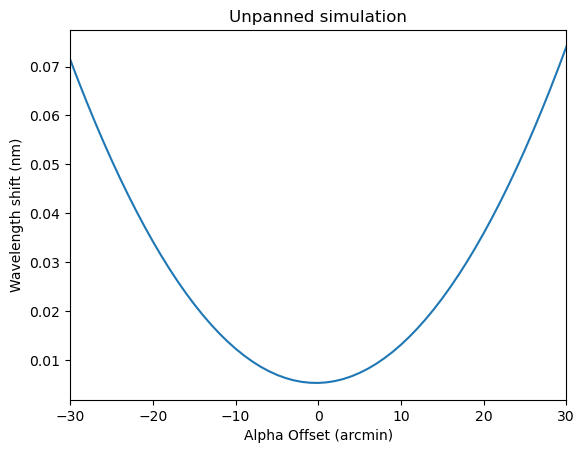

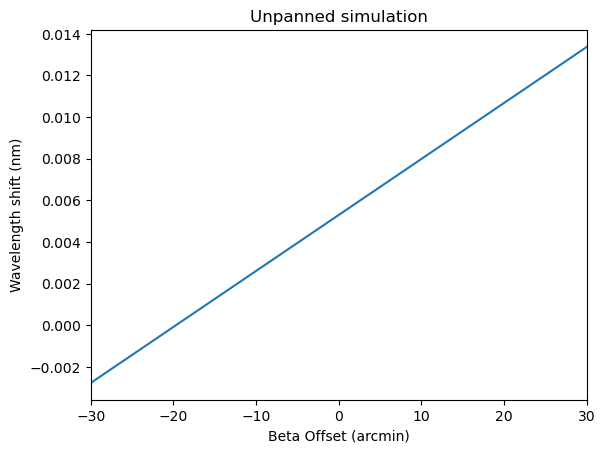

In [56]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

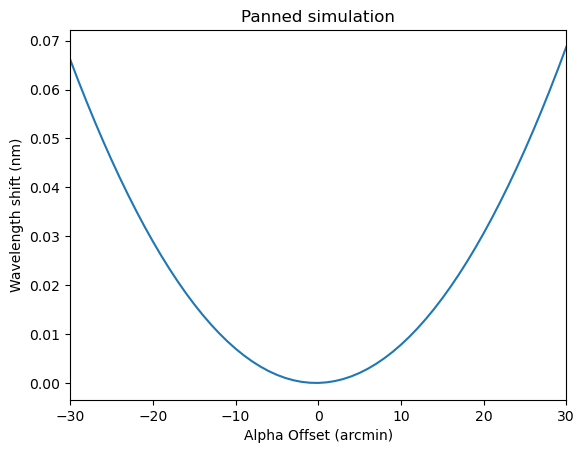

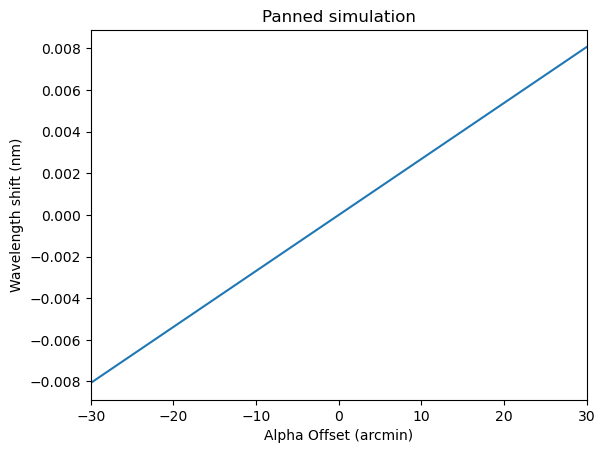

In [57]:
# Panned central wavelength shift
# Y ËΩ¥ÁöÑÈõ∂ÁÇπË¢´ËÆæÂÆö‰∏∫ÂÖ®Êó•Èù¢ He II Ë∞±Á∫øÂú®Ê≤°Êúâ‰ªª‰Ωï SDO Âç´ÊòüÂÅèËΩ¨Êó∂ÁöÑ‰∏≠ÂøÉÊ≥¢Èïø‰ΩçÁΩÆÔºå
# ‰πüÂ∞±ÊòØùõº = 0‰∏îùõΩ = 0ÁöÑÊÉÖÂÜµ
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

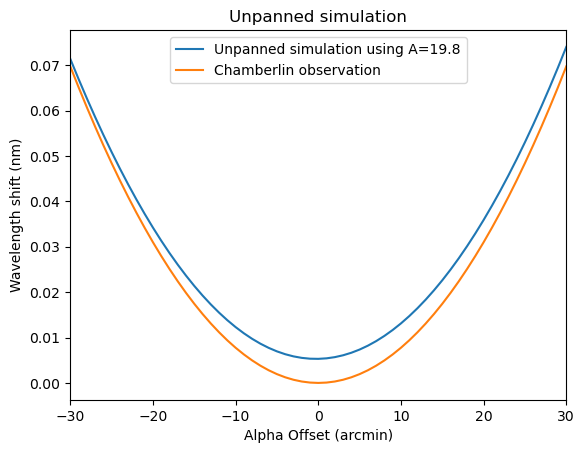

In [58]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## ÊàëÁöÑÁªìÊûú 4096 aiapy normalized

In [9]:

from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_4096/DN_4096.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

In [10]:
DN['DN_alpha'].shape

(61, 25)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

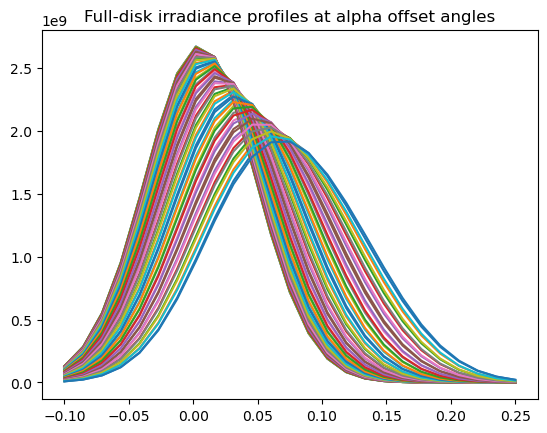

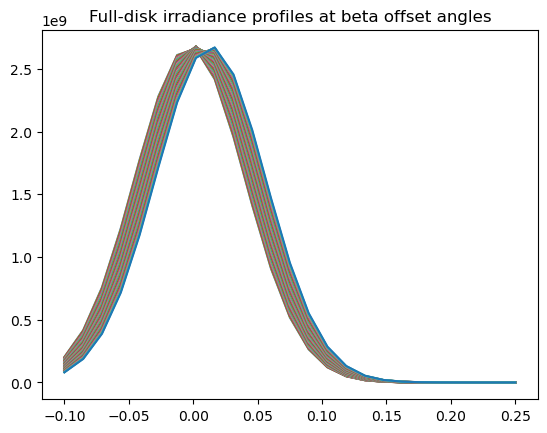

In [11]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∂ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He Ë∞±Á∫øËΩÆÂªìÈöèÂÖ•Â∞ÑÂÅèËßíùú∑ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûú")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

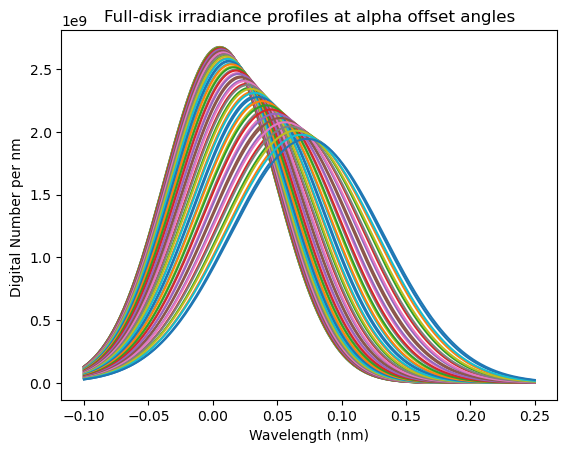

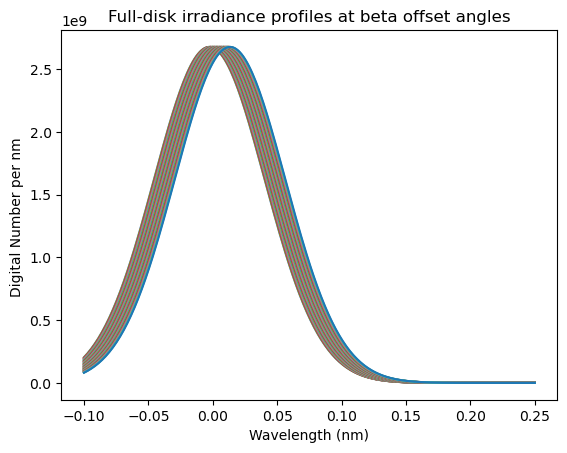

In [12]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

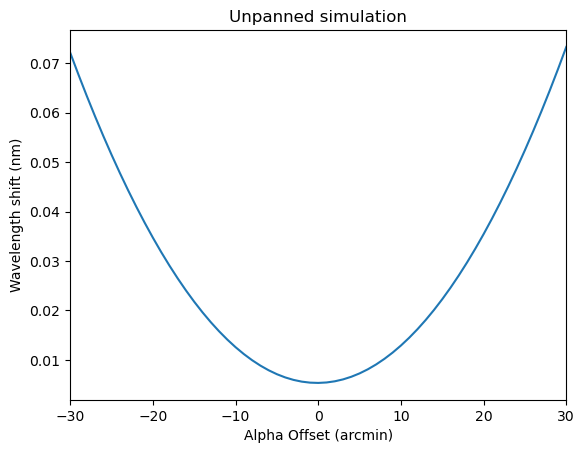

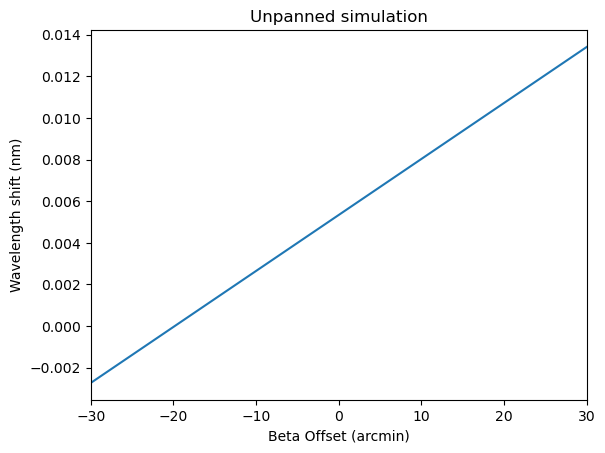

In [13]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

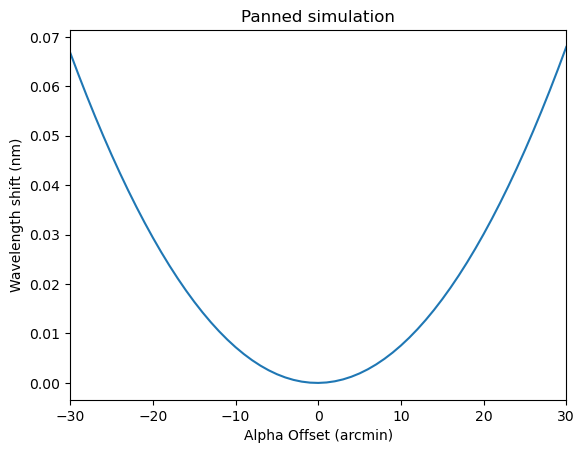

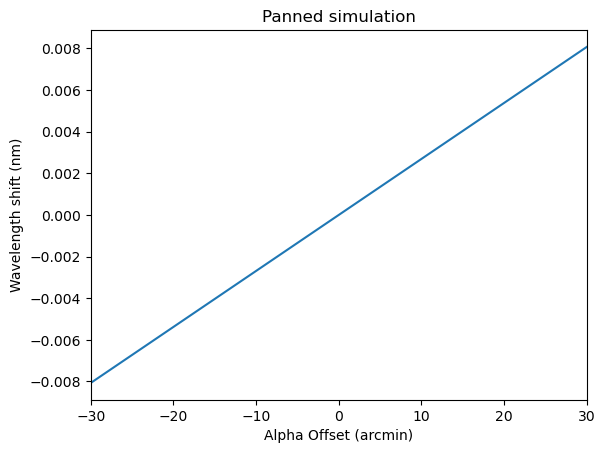

In [14]:
# Panned central wavelength shift
# Y ËΩ¥ÁöÑÈõ∂ÁÇπË¢´ËÆæÂÆö‰∏∫ÂÖ®Êó•Èù¢ He II Ë∞±Á∫øÂú®Ê≤°Êúâ‰ªª‰Ωï SDO Âç´ÊòüÂÅèËΩ¨Êó∂ÁöÑ‰∏≠ÂøÉÊ≥¢Èïø‰ΩçÁΩÆÔºå
# ‰πüÂ∞±ÊòØùõº = 0‰∏îùõΩ = 0ÁöÑÊÉÖÂÜµ
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # ÊàëÈááÁî®Áõ¥Êé•Âêë‰∏ãÂπ≥Áßª
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [15]:
#beta ÊñπÂêë‰∏éËÆ∫Êñá‰∏≠Á¨¶ÂêàÁöÑÂæàÂ•ΩÔºåÂ∞±Ê≤°ÊúâÁªßÁª≠ËÆ®ËÆ∫‰∫Ü
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[0]

0.06674531430852615

In [16]:
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[-1]

0.06795514107920358

(-30.0, 30.0)

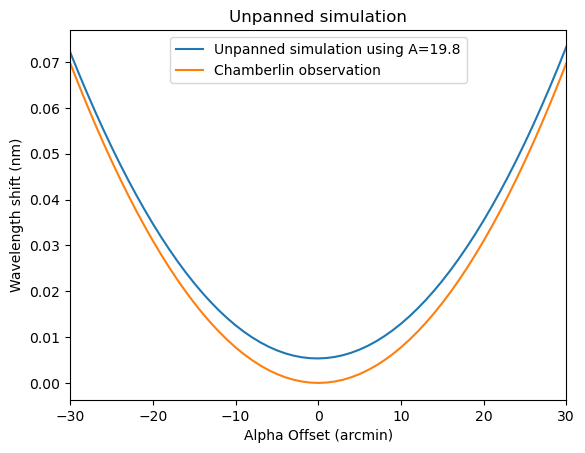

In [17]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

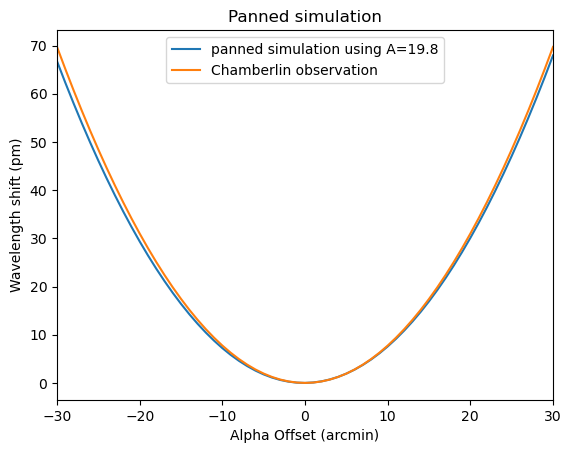

In [18]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*(wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]))
ax.plot(offaxis_angle_x_min_alpha,1e3*915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

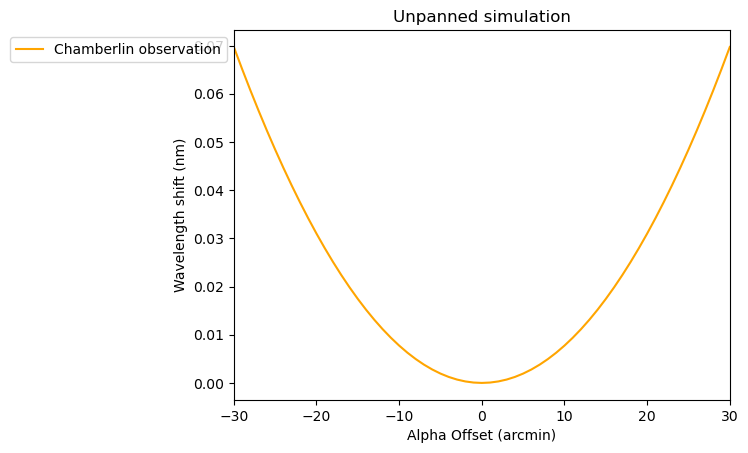

In [23]:
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,10*915.53*offaxis_angle_x_alpha**2,c="orange")  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Chamberlin observation"],bbox_to_anchor=(0, 1))
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## ËÆ∫Êñá‰∏≠ÁöÑÁªìÊûú  ÂØπÊØî

(-30.0, 30.0)

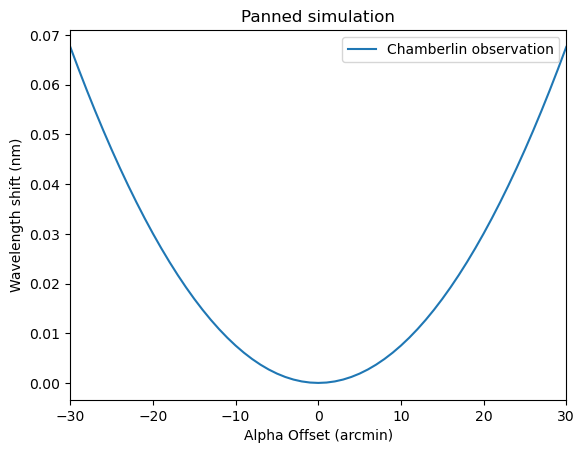

In [59]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,19.2*transunit*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

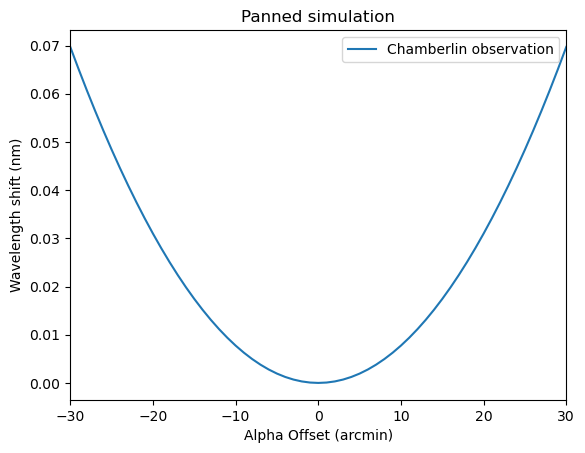

In [60]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,19.8*transunit*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

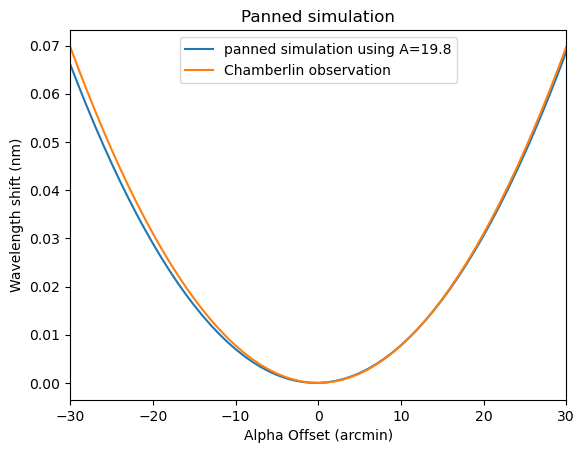

In [61]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #Ëøô‰∏™Êç¢ÁÆóËØ¶ËßÅunit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [62]:
19.8*transunit*offaxis_angle_x_alpha[0]**2

0.0697215047309075

ÊàëÁöÑÁªìÊûú‰∏äÂõæ‰∏é‰∏ãÂõæÂçöÂ£´ËÆ∫ÊñáP46ÁªìÊûúÊòéÊòæ‰∏çÂêåÔºö

‰∏äÂõæÔºöÊàëÁöÑËìùÁ∫øÊ®°ÊãüÂú®Ê©ôÁ∫ø‰∏ãÊñπ

‰∏ãÂõæÔºöÁ∫¢Ëâ≤Ê®°ÊãüÂú®ËßÇÊµãÈªëËôöÁ∫ø‰∏äÊñπ

P46 Âõæ 3.6 He II ‰∏≠ÂøÉÊ≥¢ÈïøÈöèÂÖ•Â∞ÑÂÅèËßíùú∂Âíåùú∑ÂèòÂåñÁöÑÊ®°ÊãüÁªìÊûúÂíåËßÇÊµãÁªìÊûú

<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:70%;" />



ÊàëÂØπËÆ∫ÊñáP50ÂØπ‰∫é‚Äú‰∏∫‰ªÄ‰πàAË∂äËø≠‰ª£Ë∂äÂ§ß‚ÄùÁöÑËß£ÈáäÊúâÁñëÈóÆ:

<img src="./visualization.assets/image-20230311155201746.png" alt="image-20230311155201746" style="zoom:33%;" />

ËÄåÂØπ‰∫éËÆ∫ÊñáP50ÔºåÂØπ‰∫é‚Äú‰∏∫‰ªÄ‰πàAË∂äËø≠‰ª£Ë∂äÂ§ß‚ÄùÁöÑËß£ÈáäÔºåËøô‰∏§ÁÇπÊàëÁêÜËß£‰∫ÜÔºåÊàë‰πüÂæóÂà∞‰∫ÜÁõ∏Á¨¶ÁöÑÁªìËÆ∫Ôºö

1. $\Delta \lambda_0 < \bar{\Delta \lambda}$ ÁöÑÂàÜÊûêÊ≠£Á°Æ

2. ÊâÄ‰ª•Êú™Âêë‰∏ãÂπ≥ÁßªÁöÑËìùÁ∫øÂú®Ê©ôËâ≤Á∫ø‰∏äÊñπ

    <img src="./visualization.assets/image-20230312154237323.png" alt="image-20230312154237323" style="zoom:50%;" />

3. ‰ΩÜÊòØÊàë‰∏çÁêÜËß£‰∏∫‰ªÄ‰πà‰∏äËø∞ÁêÜËÆ∫ËØ¥Êòé:Â∞ÜËìùËâ≤Á∫øÂêë‰∏ãÂπ≥ÁßªÂêéÔºàP46‰∏äÂçäÈ°µÔºâ,ËìùËâ≤Á∫ø‰ªçÂ∫îËØ•Âú®Ê©ôÁ∫ø‰∏äÊñπ„ÄÇ


   ËÄåÊàëÁöÑÁªìÊûúÂ∞±Âú®‰∏ãÊñπ‰∫Ü„ÄÇ„ÄÇ
    <img src="./visualization.assets/image-20230312154314802.png" alt="image-20230312154314802" style="zoom:50%;" />
